In [3]:
pip install vaderSentiment

import necessary Python libraries for data handling, visualization, and sentiment/topic analysis.

In [5]:
import pandas as pd
import os
# tokenizatio, Lemmatization, and stopword removal
import spacy
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
#Sentiment Analysis
import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

#Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from IPython.display import display

#Topic Modeling
from nltk.tokenize import TreebankWordTokenizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


This section loads multiple CSV files and merges them into a single DataFrame for analysis.

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# reading all the csv files & concatnating all Dataframes into a single DataFrame
csv_directory = "/content/drive/MyDrive/datasets"
output_csv_name = "merged_data.csv"

csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]
movies_df = []

for file in csv_files:
    file_path = os.path.join(csv_directory, file)
    try:
        df = pd.read_csv(file_path)
        movies_df.append(df)
        #print
    except:
        print(f"Error loading {file}: {e}. skipping")

combine_df = pd.concat(movies_df, ignore_index = True)


All CSV files are read and concatenated into a single DataFrame, combine_df which will be used for text processing and analysis.

# **Data Cleaning**

**Data Inspection**

In [31]:
print("Combined DataFrame Information:")
combine_df.info()

Combined DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22334 entries, 0 to 22333
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie                22334 non-null  object 
 1   chapter              22334 non-null  object 
 2   character            22334 non-null  object 
 3   dialog               22332 non-null  object 
 4   Unnamed: 0           14889 non-null  float64
 5   gender               14889 non-null  object 
 6   releaseYear          14889 non-null  float64
 7   processed_tokens     7444 non-null   object 
 8   processed_text       7230 non-null   object 
 9   preprocessed_tokens  7444 non-null   object 
 10  preprocessed_text    7230 non-null   object 
dtypes: float64(2), object(9)
memory usage: 1.9+ MB


In [32]:
combine_df.head(20)

,movie,chapter,character,dialog,Unnamed: 0,gender,releaseYear,processed_tokens,processed_text,preprocessed_tokens,preprocessed_text
0,Harry Potter and the Half-Blood Prince,Snape's Visitors,Bellatrix Lestrange,Narcissa!,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Harry Potter and the Half-Blood Prince,Snape's Visitors,Bellatrix Lestrange,Cissy! You mustn't do this. He can't be trusted.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Half-Blood Prince,Snape's Visitors,Narcissa Malfoy,The Dark Lord trusts him.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Harry Potter and the Half-Blood Prince,Snape's Visitors,Bellatrix Lestrange,The Dark Lord is mistaken.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Harry Potter and the Half-Blood Prince,Snape's Visitors,Bellatrix Lestrange,Or so I believe.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Harry Potter and the Half-Blood Prince,Snape's Visitors,Narcissa Malfoy,"Well, who can one trust these days?",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Harry Potter and the Half-Blood Prince,Snape's Visitors,Bellatrix Lestrange,He lives in this Muggle dunghill?,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Harry Potter and the Half-Blood Prince,Snape's Visitors,Severus Snape,"Run along, Wormtail.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Harry Potter and the Half-Blood Prince,Snape's Visitors,Narcissa Malfoy,"I've nowhere else to turn, Severus.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Harry Potter and the Half-Blood Prince,Snape's Visitors,Bellatrix Lestrange,You must be joking.,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
print("\nList of Columns in the DataFrame:")
print(combine_df.columns.tolist())


List of Columns in the DataFrame:
['movie', 'chapter', 'character', 'dialog', 'Unnamed: 0', 'gender', 'releaseYear', 'processed_tokens', 'processed_text', 'preprocessed_tokens', 'preprocessed_text']


**Data Standardization and Augmentation**

In [34]:
combine_df["character"] = combine_df["character"].str.strip().str.lower()
combine_df["movie"] = combine_df["movie"].replace("Harry Potter and the Gobelt of Fire", "Harry Potter and the Goblet of Fire")

In [35]:
hp_movies = {
    "Harry Potter and the Philosopher's Stone": 2001,
    "Harry Potter and the Chamber of Secrets": 2002,
    "Harry Potter and the Prisoner of Azkaban": 2004,
    "Harry Potter and the Goblet of Fire": 2005,
    "Harry Potter and the Order of the Phoenix": 2007,
    "Harry Potter and the Half-Blood Prince": 2009,
    "Harry Potter and the Deathly Hallows Part 1": 2010,
    "Harry Potter and the Deathly Hallows Part 2": 2011,
}
characters_gender = {
    'bellatrix lestrange': 'female',
    'narcissa malfoy': 'female',
    'severus snape': 'male',
    'waitress': 'female',
    'harry potter': 'male',
    'albus dumbledore': 'male',
    'horace horace slughorn': 'male',
    'horace slughorn': 'male',
    'ginny weasley': 'female',
    'molly weasley': 'female',
    'ron weasley': 'male',
    'hermione granger': 'female',
    'fred weasley': 'male',
    'george weasley': 'male',
    'lavender brown': 'female',
    'luna lovegood': 'female',
    'draco malfoy': 'male',
    'blaise zabini': 'male',
    'pansy parkinson': 'female',
    'filius flitwick': 'male',
    'argus filch': 'male',
    'minerva mcgonagall': 'female',
    'katie bell': 'female',
    'mrs. cole': 'female',
    'tom riddle': 'male',
    'cormac mclaggen': 'male',
    'rubeus hagrid': 'male',
    'skinny kid': 'unknown',
    'leanne': 'female',
    'neville longbottom': 'male',
    'marcus belby': 'male',
    'seamus finnigan': 'male',
    'dean thomas': 'male',
    'students': 'mixed/unknown',
    'eldred worple': 'male',
    'waiter': 'male',
    'remus lupin': 'male',
    'nymphadora tonks': 'female',
    'arthur weasley': 'male',
    'fenrir greyback': 'male',
    'rufus scrimgeour': 'male',
    'mrs. granger': 'female',
    'mr. granger': 'male',
    'voldemort': 'male',
    'lucius malfoy': 'male',
    'corban yaxley': 'male',
    'death eater': 'mixed/unknown',
    'pius thicknesse': 'male',
    'peter pettigrew': 'male',
    'charity burbage': 'female',
    'vernon dursley': 'male',
    'petunia dursley': 'female',
    'dudley dursley': 'male',
    'alastor moody': 'male',
    'kingsley shacklebolt': 'male',
    'bill weasley': 'male',
    'fleur delacour': 'female',
    'mundungus fletcher': 'male',
    'garrick ollivander': 'male',
    'voldemont': 'male',
    'xenophilius lovegood': 'male',
    'elphias doge': 'male',
    'woman': 'female',
    'muriel': 'female',
    'patronus': 'varies/spirit',
    'lily potter': 'female',
    'kreacher': 'male',
    'dobby': 'male',
    'wizard': 'male',
    'dolores umbridge': 'female',
    'percy weasley': 'male',
    'witch': 'female',
    'wakanda': 'not a character',
    'man': 'male',
    'mykew gregorovitch': 'male',
    'scabior': 'male',
    'bathilda bagshot': 'female',
    'gellert grindelwald': 'male',
    'snatcher': 'mixed/unknown',
    'griphook': 'male',
    'gang thug': 'unknown',
    'arabella figg': 'female',
    'lily potter': 'female',
    'walburga black': 'female',
    'sirius black': 'male',
    'perkins': 'male',
    'cornelius fudge': 'male',
    'susan bones': 'female',
    'angelina johnson': 'female',
    'sybill trelawney': 'female',
    'zacharias smith': 'male',
    'justin finch-fletchley': 'male',
    'michael corner': 'male',
    'lee jordan': 'male',
    'lavander brown': 'female',
    'cho chang': 'female',
    'ernest macmillan': 'male',
    'rolanda hooch': 'female',
    'everard': 'male',
    'dilys derwent': 'female',
    'phineas': 'male',
    'grawp': 'male',
    'bane': 'male',
    'james potter': 'male',
    'griselda marchbanks': 'female',
    'magorian': 'male',
    'centaur': 'mixed/unknown',
    'nearly headless nick': 'male',
    'old man': 'male',
    'bartemius crouch junior': 'male',
    'amos diggory': 'male',
    'cedric diggory': 'male',
    'announcer': 'unknown',
    'bartemius crouch': 'male',
    'trolley witch': 'female',
    'student': 'unknown',
    'igor karkaroff': 'male',
    'olympe maxime': 'female',
    'rita skeeter': 'female',
    'viktor krum': 'male',
    'nigel wolpert': 'male',
    'parvati patil': 'female',
    'padma patil': 'female',
    'voldermort': 'male',
    'moaning myrtle': 'female',
    'merpeople': 'mixed/unknown',
    'snake': 'unknown',
    'tom': 'male',
    'quirinus quirrell': 'male',
    'boy': 'male',
    'goblin': 'mixed/unknown',
    'guard': 'unknown',
    'sorting hat': 'none',
    'bloody baron': 'male',
    'girl': 'female',
    'man in a painting': 'male',
    'the fat lady': 'female',
    'class': 'mixed/unknown',
    'boy 2': 'male',
    'all': 'mixed/unknown',
    'oliver wood': 'male',
    'gryffindors': 'mixed/unknown',
    'marcus flint': 'male',
    'crowd': 'mixed/unknown',
    'ghosts': 'mixed/unknown',
    'firenze': 'male',
    'marge dursley': 'female',
    'stanley shunpike': 'male',
    'shrunken head': 'unknown',
    'maid': 'female',
    'other': 'unknown',
    'vincent crabbe': 'male',
    'rosmerta': 'female',
    'ghost': 'mixed/unknown',
    'photographer': 'unknown',
    'gilderoy lockhart': 'male',
    'station guard': 'male',
    'whomping willow': 'none',
    'pomona sprout': 'female',
    'collin creevey': 'male',
    'howler': 'none',
    'pixie': 'unknown',
    'basilisk': 'unknown',
    'poppy pomfrey': 'female',
    'gregory goyle': 'male',
    'diary': 'none',
    'aragog': 'male',
    'bogrod': 'male',
    'aberforth dumbledore': 'male',
    'alecto carrow': 'female',
    'pansy parkinson': 'female',
    'professors': 'mixed/unknown',
    'helena ravenclaw': 'female',
    'albus potter': 'male',
    'mary cattermole': 'female'
}
# Mapping release years and gender to the dataframe
combine_df["gender"] = combine_df["character"].map(characters_gender)
combine_df["releaseYear"] = combine_df["movie"].map(hp_movies)

In [36]:
combine_df.head()

,movie,chapter,character,dialog,Unnamed: 0,gender,releaseYear,processed_tokens,processed_text,preprocessed_tokens,preprocessed_text
0,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Narcissa!,NaN,female,2009,NaN,NaN,NaN,NaN
1,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Cissy! You mustn't do this. He can't be trusted.,NaN,female,2009,NaN,NaN,NaN,NaN
2,Harry Potter and the Half-Blood Prince,Snape's Visitors,narcissa malfoy,The Dark Lord trusts him.,NaN,female,2009,NaN,NaN,NaN,NaN
3,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,The Dark Lord is mistaken.,NaN,female,2009,NaN,NaN,NaN,NaN
4,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Or so I believe.,NaN,female,2009,NaN,NaN,NaN,NaN


**Handling missin values**

In [37]:
print("\nNumber of missing values before cleaning:")
print(combine_df.isnull().sum())

combine_df.dropna(inplace=True)

print("\nNumber of missing values after cleaning:")
print(combine_df.isnull().sum())


Number of missing values before cleaning:
movie                      0
chapter                    0
character                  0
dialog                     2
Unnamed: 0              7445
gender                    13
releaseYear                0
processed_tokens       14890
processed_text         15104
preprocessed_tokens    14890
preprocessed_text      15104
dtype: int64

Number of missing values after cleaning:
movie                  0
chapter                0
character              0
dialog                 0
Unnamed: 0             0
gender                 0
releaseYear            0
processed_tokens       0
processed_text         0
preprocessed_tokens    0
preprocessed_text      0
dtype: int64


In [38]:
# Standardizin Text in "dialog" and "character" columns
def standardize_text(text):
    if pd.isna(text):
        return text
    text = str(text).lower()
    text = "".join(char for char in text if char.isalnum() or char.isspace() or char in ['!',"'"])
    return text.strip()

combine_df["dialog"] =  combine_df["dialog"].apply(standardize_text)
combine_df["character"] = combine_df["character"].apply(standardize_text)

combine_df["dialog"].head()


,dialog
7445,narcissa!
7446,cissy! you mustn't do this he can't be trusted
7447,the dark lord trusts him
7448,the dark lord is mistaken
7449,or so i believe


**Tokenization, Lemmatization, and Stopword Removal**

loading he English spaCy model to perform tokenization, lemmatization, and stopword removal.

In [39]:
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words("english"))

# modifying stopwords list
stop_words.discard("not")
additional_stopwords = ['I', 'not', 'well', 'would', "'s", 'one', 'say', 'go', 'know', 'get','see','come']
stop_words.update(additional_stopwords)

def preprocess_text_spacy(text):
    cleaned_text = re.sub(r'\s+', ' ', text).strip()

    doc =  nlp(cleaned_text.lower())
    processed_tokens = []

    for token in doc:
        lemma = token.lemma_

        if lemma and lemma.strip() and lemma not in stop_words:
            processed_tokens.append(lemma)
    return processed_tokens
# Applying preprocessing function
combine_df["preprocessed_tokens"] = combine_df["dialog"].apply(preprocess_text_spacy)
combine_df["preprocessed_text"] = combine_df["preprocessed_tokens"].apply(lambda x : " ".join(x))

print(combine_df["preprocessed_text"].head(10))


7445                   narcissa !
7446           cissy ! must trust
7447              dark lord trust
7448           dark lord mistaken
7449                      believe
7450                    trust day
7451         live muggle dunghill
7452           run along wormtail
7453    nowhere else turn severus
7454                    must joke
Name: preprocessed_text, dtype: object


In [40]:
# removing duplicate dialogues by cosidering the cobination of "character" and "preprocessed_text"
combine_df = combine_df.drop_duplicates(subset=['character', 'preprocessed_text'], keep='first')

In [41]:
combine_df.to_csv("merge_data.csv")

# **Exploratory Data Analysis (EDA)**

In [ ]:
print("Descriptive Statistics of Numerical Columns:")
print(combine_df.describe())

Descriptive Statistics of Numerical Columns:
       releaseYear
count  6612.000000
mean   2006.120992
std       3.406357
min    2001.000000
25%    2002.000000
50%    2007.000000
75%    2009.000000
max    2011.000000


In [ ]:
print("\nValue Counts for Categorical Columns:")
for col in ['movie', 'chapter', 'character', 'gender']:
    print(f"\nValue counts for {col}:")
    print(combine_df[col].value_counts())


Value Counts for Categorical Columns:

Value counts for movie:
movie
Harry Potter and the Order of the Phoenix      1015
Harry Potter and the Half-Blood Prince          993
Harry Potter and the Chamber of Secrets         881
Harry Potter and the Deathly Hallows Part 1     855
Harry Potter and the Philosopher's Stone        792
Harry Potter and the Prisoner of Azkaban        774
Harry Potter and the Goblet of Fire             682
Harry Potter and the Deathly Hallows Part 2     620
Name: count, dtype: int64

Value counts for chapter:
chapter
Horcruxes                      105
What Could Be Safer?            94
The Lost Prophecy               90
Perilous Potions                89
The Department of Mysteries     83
                              ... 
The Goblet of Fire               1
The Dementor's Kiss              1
Under Covers Prologue            1
Tom Riddle                       1
Writing on the wall              1
Name: count, Length: 237, dtype: int64

Value counts for character:


In [ ]:
combine_df['sentence_length'] = combine_df['preprocessed_tokens'].apply(len)
print(f"\nAverage Sentence Length: {combine_df['sentence_length'].mean()}")


Average Sentence Length: 5.293557168784029


In [ ]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6612 entries, 0 to 7444
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   movie                6612 non-null   object
 1   chapter              6612 non-null   object
 2   character            6612 non-null   object
 3   dialog               6612 non-null   object
 4   gender               6612 non-null   object
 5   releaseYear          6612 non-null   int64 
 6   preprocessed_tokens  6612 non-null   object
 7   preprocessed_text    6612 non-null   object
 8   sentence_length      6612 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 516.6+ KB


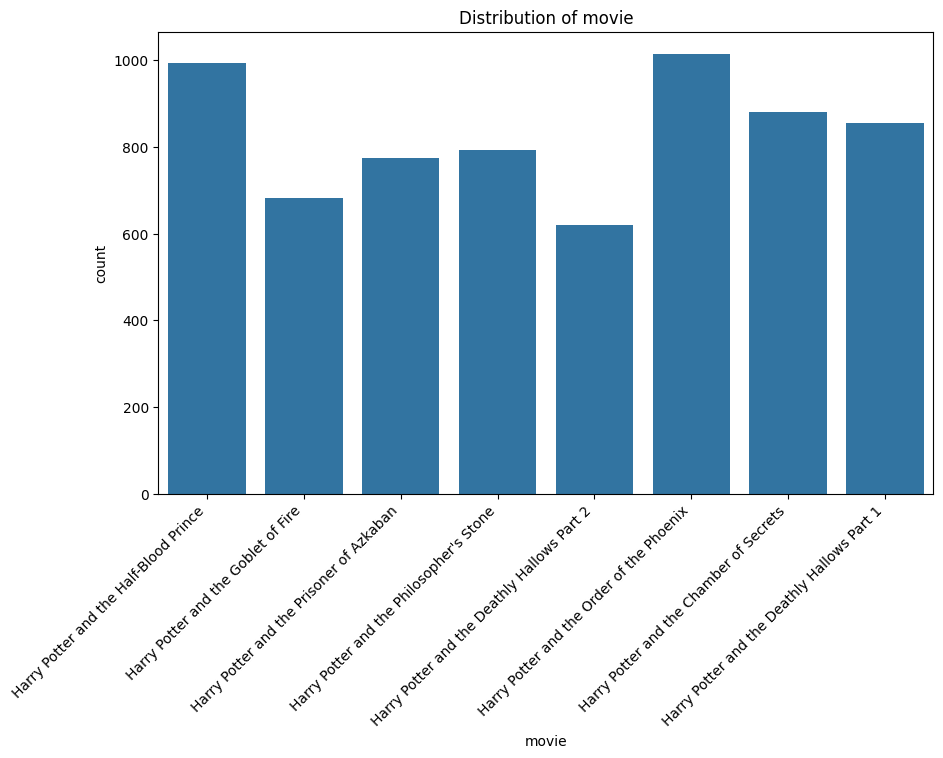

In [ ]:
# Movie title Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=combine_df, x='movie')
plt.title('Distribution of movie')
plt.xticks(rotation=45, ha='right')
plt.show()

The shows the amount of dialogue, which movie it came from.

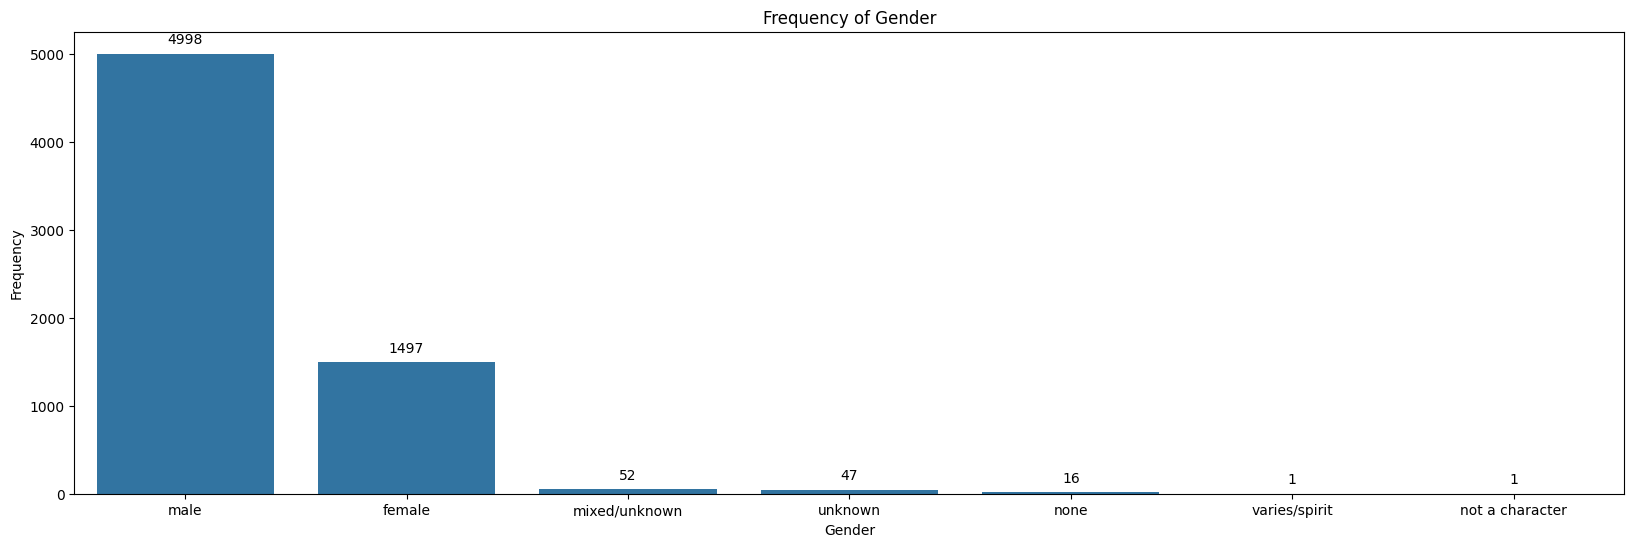

In [ ]:
gender_counts = combine_df['gender'].value_counts()

# Set figure size
plt.figure(figsize=(20, 6))

# Create the bar chart using Seaborn
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of Gender')

# Annotate the frequency values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Frequency value
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the annotation
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()


The bar chart displays the count of instances for each gender category in a dataset.

[('!', 2304), ('harry', 658), ('think', 382), ('potter', 309), ("'", 243), ('tell', 234), ('like', 233), ('right', 222), ('oh', 220), ('take', 212), ('good', 203), ('look', 196), ('time', 181), ('dumbledore', 181), ('sir', 175), ('want', 175), ('yes', 169), ('ron', 167), ('could', 165), ('let', 165)]


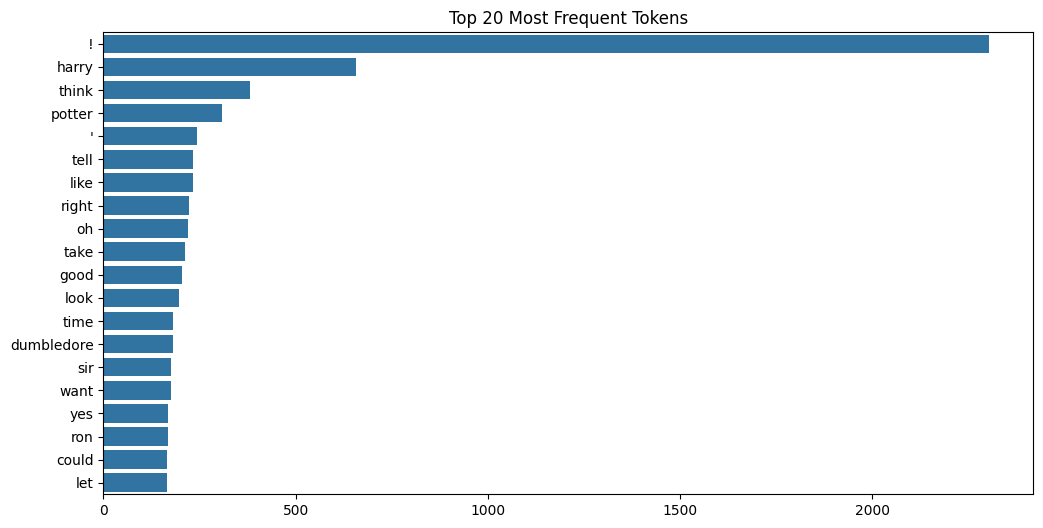

In [ ]:
# finds and plots the top 20 most frequent tokens from 'preprocessed_tokens'
all_tokens = [token for sublist in combine_df['preprocessed_tokens'] for token in sublist]
token_counts = Counter(all_tokens)
top_20_tokens = token_counts.most_common(20)
print(top_20_tokens)

tokens, counts = zip(*top_20_tokens)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(tokens))
plt.title('Top 20 Most Frequent Tokens')
plt.show()

The chart shows common tokens in the dataset,with '!' been the most frequen indicating emotional expression and words like 'think' and 'tell' suggesting opinions. This suggests the dataset has strong emotional or conversational content, useful for sentiment analysis

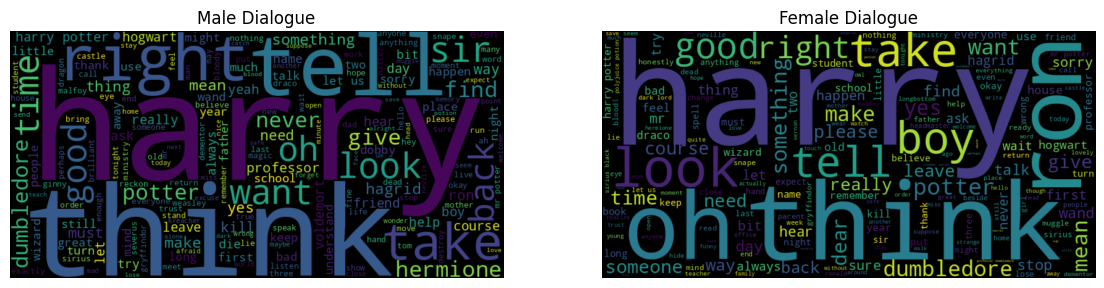

In [ ]:
# Male vs. Female Dialogue Word Clouds
male_text = " ".join(combine_df[combine_df["gender"] == "male"]["preprocessed_text"])
female_text = " ".join(combine_df[combine_df["gender"] == "female"]["preprocessed_text"])

# Generating word clouds for dialogue
wc_male = WordCloud(width = 800, height = 400).generate(male_text)
wc_female = WordCloud(width = 800, height = 400).generate(female_text)

plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
plt.imshow(wc_male, interpolation = "bilinear")
plt.axis("off")
plt.title("Male Dialogue")

plt.subplot(1, 2, 2)
plt.imshow(wc_female, interpolation="bilinear")
plt.axis("off")
plt.title("Female Dialogue")
plt.show()

Word clouds comparing male and female dialogues. Each cloud highlights the most frequently used words by each gender. These visualizations reveal differences in language patterns between genders, showing which words are most commonly used in their dialogues.

# **Sentiment Analysis**

In [ ]:
# Vader
# The 'compound' score ranges from -1 (most negative) to +1 (most positive)
vader = SentimentIntensityAnalyzer()
combine_df["vader_sentiment"] = combine_df["preprocessed_text"].apply(lambda x : vader.polarity_scores(x)["compound"])

# TextBlob
# Polarity ranges from -1 (negative) to +1 (positive)
combine_df["textblob_sentiment"] = combine_df["preprocessed_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# BERT
bert_sentiment = pipeline("sentiment-analysis")
combine_df["bert_sentiment"] = combine_df["preprocessed_text"].apply(lambda x: bert_sentiment(x[:512])[0]["label"])


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


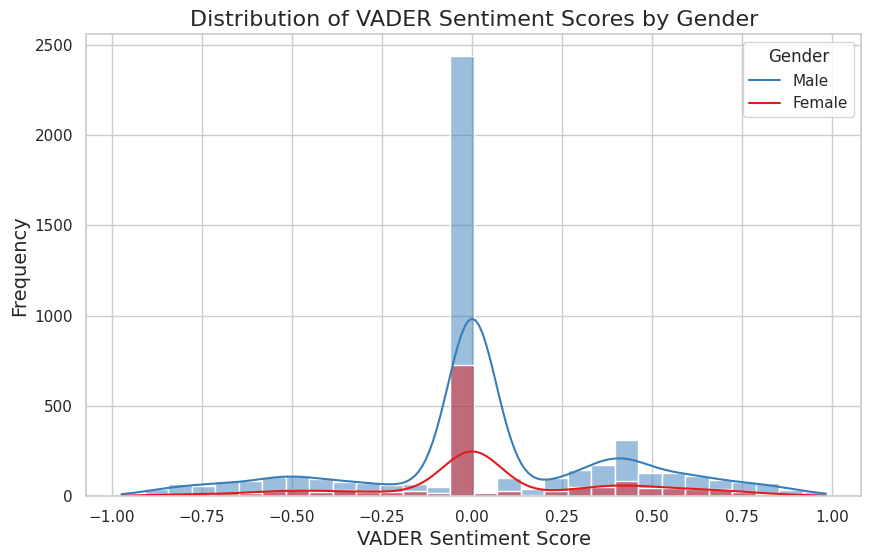

In [ ]:

# Filter the data to include only male and female genders
filtered_df = combine_df[combine_df['gender'].isin(['male', 'female'])]

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a histogram or density plot
sns.histplot(data=filtered_df, x='vader_sentiment', hue='gender', kde=True, palette='Set1', bins=30)

# Add labels and title
plt.title('Distribution of VADER Sentiment Scores by Gender', fontsize=16)
plt.xlabel('VADER Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Gender', labels = ["Male", "Female"])

# Show the plot
plt.show()


This graph shows the distribution of VADER sentiment scores by gender. It highlights that males tend to have more positive and negative sentiment scores. Ther is also a wide range of sentiments, from negative to positive, indicating diverse  emotions in the dataset

In [ ]:
filtered_df = combine_df[combine_df['gender'].isin(['male', 'female'])]
filtered_df['gender'].describe()

,gender
count,6495
unique,2
top,male
freq,4998


In [ ]:
print(filtered_df['gender'].unique())


['female' 'male']


In [ ]:
filtered_df['gender'].value_counts()

,count
gender,
male,4998
female,1497


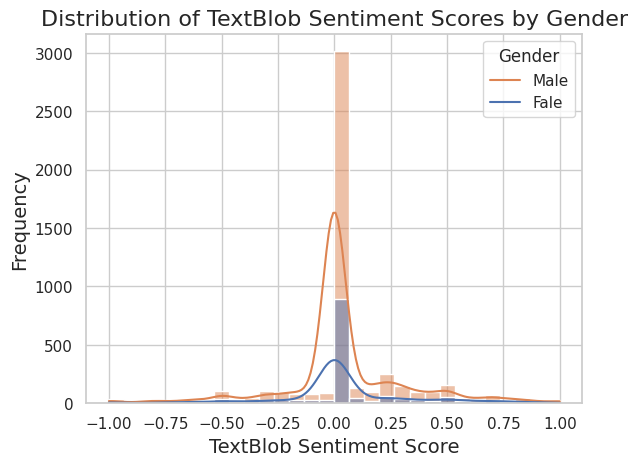

In [ ]:
# Create a density plot for TextBlob sentiment
sns.histplot(data=filtered_df, x='textblob_sentiment', hue='gender', kde=True , bins=30)

# labels and title
plt.title('Distribution of TextBlob Sentiment Scores by Gender', fontsize=16)
plt.xlabel('TextBlob Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.legend(title='Gender', labels=['Male', 'Fale'])

# Show the plot
plt.show()

The graph displays the sentiment scores of TextBlob by gender, showing that males tend to have more varied sentiment scores while females scores are more concentrated around neutral. Also, the average sentiment scores are near neutral with a tight distribution showing that most texts are emotionally balanced or slightly positive.

In [ ]:
print("\nBERT Sentiment Scores:")
print(combine_df['bert_sentiment'].describe())



BERT Sentiment Scores:
count         6612
unique           2
top       POSITIVE
freq          3472
Name: bert_sentiment, dtype: object


In [ ]:
bert_sentiment_analyzer = pipeline("sentiment-analysis")
# function to get the sentiment label from BERT
def get_sentiment_label(text):
    try:
        text = str(text)
        result = bert_sentiment_analyzer(text[:512])[0]  # Truncate to 512 characters
        return result['label']
    except Exception as e:
        print(f"Error during BERT sentiment analysis: {e}")
        return None

# Apply the function to create the 'bert_sentiment' column
combine_df["bert_sentiment"] = combine_df["preprocessed_text"].apply(get_sentiment_label)

# Convert BERT sentiment labels to numerical values
sentiment_map = {'NEGATIVE': -1, 'NEUTRAL': 0, 'POSITIVE': 1}

# Now convert the string labels to numbers
combine_df["bert_sentiment"] = combine_df["bert_sentiment"].map(sentiment_map).fillna(0)
print("\nBERT Sentiment Scores:")
print(combine_df['bert_sentiment'].describe())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu



BERT Sentiment Scores:
count    6612.000000
mean        0.050212
std         0.998814
min        -1.000000
25%        -1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: bert_sentiment, dtype: float64


Most texts are strongly polarized towards positive or negative sentiments, with fewer neutral texts

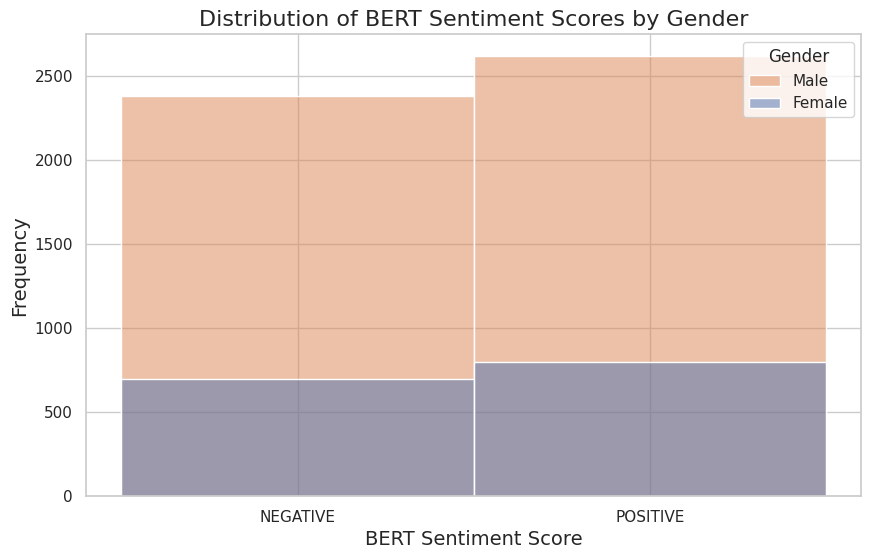

In [ ]:

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")


# Create a histogram or density plot for BERT sentiment
sns.histplot(data=filtered_df, x='bert_sentiment', hue='gender', kde=False, bins=30)

# Add labels and title
plt.title('Distribution of BERT Sentiment Scores by Gender', fontsize=16)
plt.xlabel('BERT Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Modify the legend to explicitly show which color is male and female
plt.legend(title='Gender', labels=['Male', 'Female'])

# Show the plot
plt.show()


Thebar chart shows the frequency of negative and positive sentiment scores for males and females. Both sentiment categories have more male  texts than female  texts. Therefore, having more positive texts means that a larger proportion of the analyzed dialogue expresses a positive sentiment

In [ ]:
# Create a summary DataFrame comparing the average of all gender sentiment scores
sentiment_comparison = combine_df[['vader_sentiment', 'textblob_sentiment', 'bert_sentiment']].describe()
print("\nSentiment Comparison:")
print(sentiment_comparison)


Sentiment Comparison:
       vader_sentiment  textblob_sentiment  bert_sentiment
count      6612.000000         6612.000000     6612.000000
mean          0.051393            0.041841        0.050212
std           0.363078            0.278947        0.998814
min          -0.976900           -1.000000       -1.000000
25%           0.000000            0.000000       -1.000000
50%           0.000000            0.000000        1.000000
75%           0.296000            0.050000        1.000000
max           0.982100            1.000000        1.000000


VADER and TextBlob scores are centered around zero, indicating a balanced mix of positive and negative sentiments, with some neutral comments.
BERT scores are predominantly polarized, with most values at -1 or 1, showing a tendency to classify texts as strongly negative or positive but very few neutral

In [ ]:
movie_sentiment = combine_df.groupby('movie')[['vader_sentiment', 'textblob_sentiment', 'bert_sentiment']].mean()
print("\nSentiment Trends by Movie:")
print(movie_sentiment)



Sentiment Trends by Movie:
                                             vader_sentiment  \
movie                                                          
Harry Potter and the Chamber of Secrets             0.034195   
Harry Potter and the Deathly Hallows Part 1         0.037536   
Harry Potter and the Deathly Hallows Part 2         0.016121   
Harry Potter and the Goblet of Fire                 0.069502   
Harry Potter and the Half-Blood Prince              0.094102   
Harry Potter and the Order of the Phoenix           0.030330   
Harry Potter and the Philosopher's Stone            0.065916   
Harry Potter and the Prisoner of Azkaban            0.056539   

                                             textblob_sentiment  \
movie                                                             
Harry Potter and the Chamber of Secrets                0.031462   
Harry Potter and the Deathly Hallows Part 1            0.043685   
Harry Potter and the Deathly Hallows Part 2            0.036174

VADER and TextBlob scores are mostly positive but modest, indicating slightly favorable sentiments across movies. BERT scores vary more, with some movies like "Deathly Hallows Part 2" and "Goblet of Fire" showing higher positive values, while "Chamber of Secrets" has a slightly negative score.positive across the movies, with BERT highlighting some movies more strongly associated with positive sentiments.



<Figure size 10000x10000 with 0 Axes>

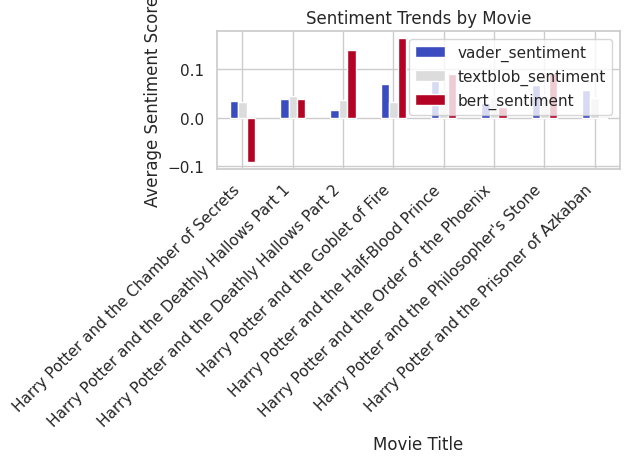

In [ ]:
plt.figure(figsize=(100, 100))
movie_sentiment.plot(kind='bar', colormap='coolwarm')
plt.title('Sentiment Trends by Movie')
plt.xlabel('Movie Title')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The visualization highlights differences in sentiment across movies and analysis methods, revealing which movies conveyed more positive or negative sentiment in the reviews or dialogues analyzed.

Top 20 Characters by Number of Occurrences:
['harry potter', 'ron weasley', 'hermione granger', 'albus dumbledore', 'rubeus hagrid', 'severus snape', 'minerva mcgonagall', 'horace slughorn', 'voldemort', 'remus lupin', 'draco malfoy', 'neville longbottom', 'alastor moody', 'dolores umbridge', 'fred weasley', 'arthur weasley', 'sirius black', 'cornelius fudge', 'george weasley', 'vernon dursley']

Sentiment Trends by Character (Top 20):
                    vader_sentiment  textblob_sentiment  bert_sentiment
character                                                              
horace slughorn            0.169848            0.093769       -0.016129
minerva mcgonagall         0.140862            0.094452        0.072000
albus dumbledore           0.130372            0.079163        0.133787
remus lupin                0.125552            0.075368        0.092593
severus snape              0.098911            0.044209        0.037975
fred weasley               0.080322            0.118599 

<Figure size 1200x600 with 0 Axes>

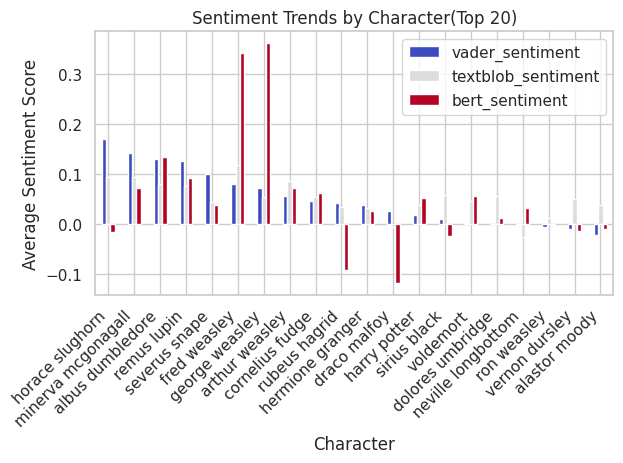

In [ ]:
# Identify top 20 most frequent characters

character_counts = combine_df['character'].value_counts()
top_20_characters = character_counts.head(20).index.tolist() # get the index as a list

# Filter the DataFrame to include only the top 20 characters
top_characters_df = combine_df[combine_df['character'].isin(top_20_characters)]

# Print the information
print("Top 20 Characters by Number of Occurrences:")
print(top_20_characters)
# Calculate sentiment trends by character for the selected top characters
character_sentiment = top_characters_df.groupby('character')[['vader_sentiment', 'textblob_sentiment', 'bert_sentiment']].mean()

print("\nSentiment Trends by Character (Top 20):")
print(character_sentiment.sort_values(by='vader_sentiment', ascending = False).head(20))

# Plot the character sentiment.
plt.figure(figsize=(12, 6))
character_sentiment.sort_values(by='vader_sentiment', ascending = False).head(20).plot(kind='bar', colormap='coolwarm')
plt.title('Sentiment Trends by Character(Top 20)')
plt.xlabel('Character')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The bar chart compares the average sentiment scores of the top 20 most frequent characters, calculated using three sentiment analysis models: Vader, TextBlob, and BERT. While Vader and TextBlob generally assign positive scores to most characters, BERT shows more extreme positive scores for Fred and George Weasley and more negative scores for Draco Malfoy and Rubeus Hagrid

In [ ]:
# 2. Define Assertiveness: High positive/negative sentiment = assertive
combine_df["assertive"] = combine_df["vader_sentiment"].apply(lambda x: abs(x) > 0.5)

# 3. Calculate Average Assertiveness by Gender
assertiveness_by_gender = combine_df.groupby("gender")["assertive"].mean().sort_values(ascending=False)
print("Average Assertiveness by Gender:")
print(assertiveness_by_gender)

Average Assertiveness by Gender:
gender
varies/spirit      1.000000
unknown            0.276596
male               0.209284
female             0.197729
mixed/unknown      0.192308
none               0.125000
not a character    0.000000
Name: assertive, dtype: float64


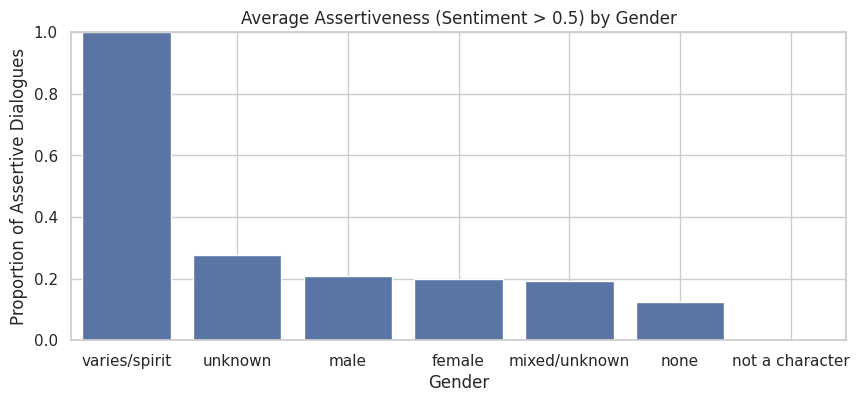

In [ ]:
# Bar plot of average assertiveness
plt.figure(figsize=(10, 4))
sns.barplot(x=assertiveness_by_gender.index, y=assertiveness_by_gender.values)
plt.title("Average Assertiveness (Sentiment > 0.5) by Gender")
plt.ylabel("Proportion of Assertive Dialogues")
plt.xlabel("Gender")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

The bar chart and accompanying data table show the average assertiveness by gender, with assertiveness defined as a sentiment score with an absolute value greater than 0.5. The results indicate that the "varies/spirit" category is the most assertive with a score of 1.0, followed by "unknown" at 0.28, and "male" and "female" at approximately 0.21 and 0.20, respectively. The "not a character" category is the least assertive, with a score of 0.0